In [1]:
from PIL import Image, ImageDraw
import numpy as np
import h5py

In [2]:
with h5py.File('../images_tensor_data_100.h5', 'r') as h5f:
    ds = h5f['image'][:]
    # image_tensor = torch.tensor(image_data, dtype=torch.uint8)

print(f'Shape: {ds.shape}')

ds[0]

Shape: (100, 3, 256, 256)


array([[[125, 123, 124, ..., 133, 134, 136],
        [134, 130, 127, ..., 136, 138, 140],
        [141, 135, 131, ..., 136, 137, 138],
        ...,
        [ 69,  59,  52, ..., 121, 124, 123],
        [ 80,  62,  69, ..., 118, 124, 125],
        [113,  98,  76, ..., 124, 130, 131]],

       [[182, 181, 182, ..., 192, 193, 195],
        [191, 188, 185, ..., 195, 197, 199],
        [198, 193, 189, ..., 195, 196, 197],
        ...,
        [ 69,  61,  54, ..., 102, 102, 101],
        [ 78,  60,  70, ..., 103, 106, 105],
        [110,  96,  77, ..., 110, 114, 115]],

       [[147, 143, 144, ..., 124, 125, 127],
        [156, 150, 147, ..., 129, 129, 131],
        [163, 155, 151, ..., 129, 130, 131],
        ...,
        [ 57,  48,  43, ...,  60,  65,  64],
        [ 63,  47,  56, ...,  62,  68,  70],
        [ 93,  81,  63, ...,  71,  78,  79]]], dtype=uint8)

In [3]:
def generate_irregular_damage(image: Image.Image, max_radius=24, min_radius=8, points=10) -> Image.Image:
    image = image.copy()
    draw = ImageDraw.Draw(image)

    x_center = np.random.randint(max_radius, image.size[0] - max_radius)
    y_center = np.random.randint(max_radius, image.size[1] - max_radius)

    angles = np.linspace(0, 2 * np.pi, points, endpoint=False)
    radii = np.random.randint(min_radius, max_radius, size=points)
    vertices = [
        (
            int(x_center + radius * np.cos(angle)),
            int(y_center + radius * np.sin(angle))
        )
        for angle, radius in zip(angles, radii)
    ]

    vertices.append(vertices[0])

    draw.polygon(vertices, fill=(255, 255, 255))
    
    return image


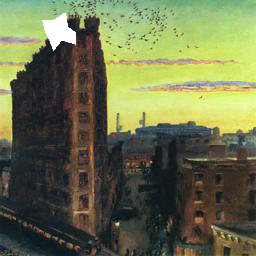

In [16]:
image = ds[0].transpose(1, 2, 0)

image = Image.fromarray(image)

generate_irregular_damage(image)